In [2]:
import pandas as pd

# Intentar cargar el archivo con una codificación diferente
df = pd.read_csv("./movies.csv", encoding="ISO-8859-1")



## Pregunta 9
¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

castWomenAmount    float64
castMenAmount      float64
popularity         float64
revenue            float64
dtype: object


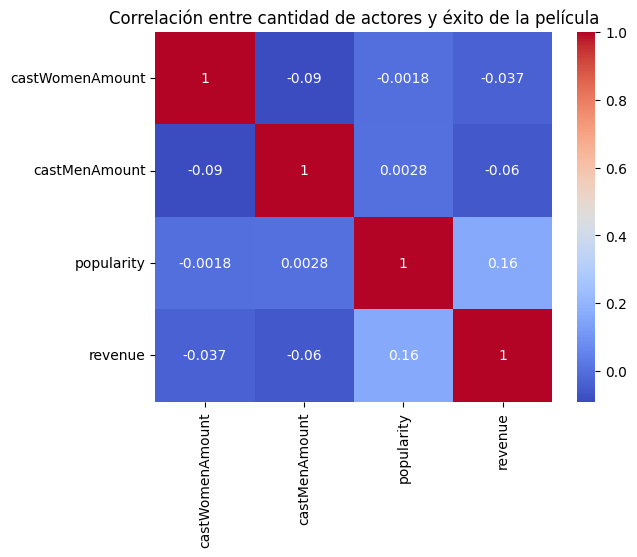

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']] = df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']].apply(pd.to_numeric, errors='coerce')
print(df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']].dtypes)

# Correlación entre cantidad de actores y popularidad/ingresos
correlations = df[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']].corr()

# Mostrar la matriz de correlación
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlación entre cantidad de actores y éxito de la película")
plt.show()




# Pregunta 10
¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [8]:
from IPython.display import display

df_filtered = df.dropna(subset=['director'])

top_directors = df_filtered[['director', 'title', 'voteAvg']].sort_values(by='voteAvg', ascending=False).head(20)
directors_n = df_filtered[['director', 'voteAvg']].sort_values(by="voteAvg", ascending=False).head(20)
display(top_directors)
print(directors_n['director'].tolist())


,director,title,voteAvg
9733,Christin Baker,Christmas at the Ranch,10.0
8632,Thomas Coven,Hot Naked Sex & the City,10.0
9347,Kaku Arakawa,How Ponyo was Born ~Hayao Miyazaki's Thought P...,10.0
9990,Miguel Angel Zavala,Los Vengadores Chiflados,10.0
9084,Víctor Barba|Juan Olivares,Holidays,10.0
9246,Rebecca Sugar,Steven Universe: The Movie: Behind the Curtain,10.0
9298,Laurent Bouzereau,Spirit of Vengeance: The Making of 'Ghost Rider',10.0
6885,Dave Bullock|Troy Adomitis|Victor Cook,The Spectacular Spider-Man Attack of the Lizard,9.6
6170,Samuel Leong,Ebola Zombies,9.5
9368,Won Myeong-jun,Aunt's Temptation 3,9.5


['Christin Baker', 'Thomas Coven', 'Kaku Arakawa', 'Miguel Angel Zavala', 'Víctor Barba|Juan Olivares', 'Rebecca Sugar', 'Laurent Bouzereau', 'Dave Bullock|Troy Adomitis|Victor Cook', 'Samuel Leong', 'Won Myeong-jun', 'Selena Quintanilla', 'Haruo Sotozaki', 'Haruo Sotozaki', 'Park Jun-soo', 'Kim Nam-joon|Jeon Jung-kook|Kim Tae-hyung|Park Ji-min|Jung Ho-seok|Kim Seok-jin|Min Yoon-gi', 'Ulises Valencia', 'Igor Kopylov', 'Park Jun-soo', 'Atip Ketubol|Phakhawat Phakanan', 'Cybil Richards']


# Pregunta 11
¿Cómo se correlacionan los presupuestos con los ingresos?

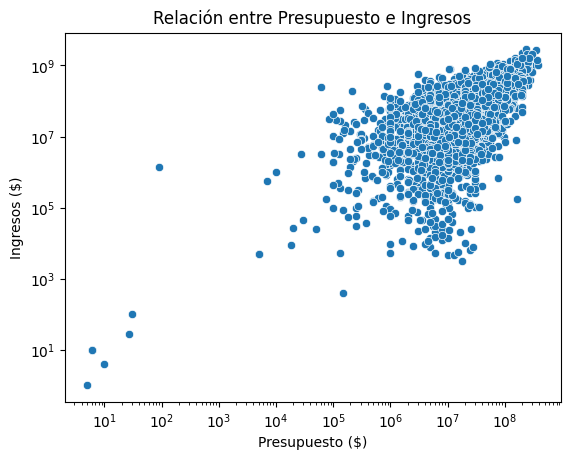

Matriz de correlación entre presupuesto e ingresos:
           budget   revenue
budget   1.000000  0.757454
revenue  0.757454  1.000000


In [30]:
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.xlabel("Presupuesto ($)")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Presupuesto e Ingresos")
plt.xscale("log")
plt.yscale("log")
plt.show()

correlation = df[['budget', 'revenue']].corr()
print("Matriz de correlación entre presupuesto e ingresos:")
print(correlation)


# Pregunta 12 
 ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

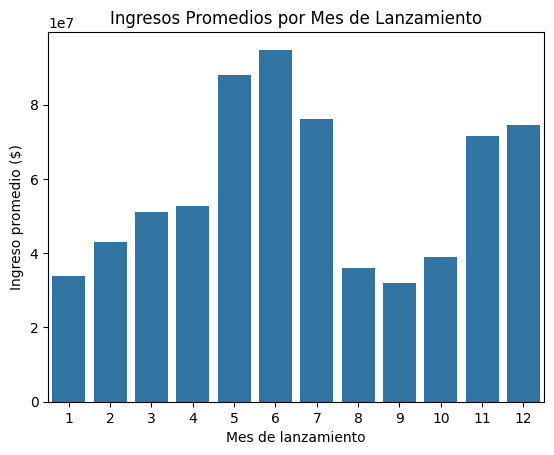

In [31]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['releaseMonth'] = df['releaseDate'].dt.month

monthly_revenue = df.groupby('releaseMonth')['revenue'].mean().sort_values(ascending=False)
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingreso promedio ($)")
plt.title("Ingresos Promedios por Mes de Lanzamiento")
plt.show()


# Pregunta 13
¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuántas películas, en promedio, se han lanzado por mes?

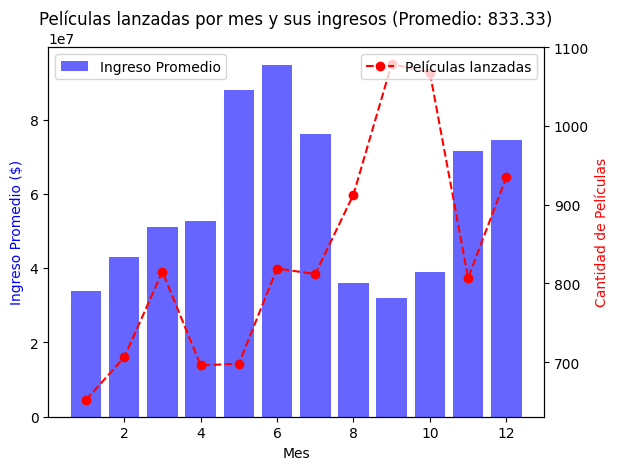

In [32]:
monthly_count = df['releaseMonth'].value_counts().sort_index()
avg_movies_per_month = monthly_count.mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(monthly_revenue.index, monthly_revenue.values, color='b', alpha=0.6, label="Ingreso Promedio")
ax2.plot(monthly_count.index, monthly_count.values, color='r', marker='o', linestyle='dashed', label="Películas lanzadas")

ax1.set_xlabel("Mes")
ax1.set_ylabel("Ingreso Promedio ($)", color='b')
ax2.set_ylabel("Cantidad de Películas", color='r')

plt.title(f"Películas lanzadas por mes y sus ingresos (Promedio: {avg_movies_per_month:.2f})")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


# Pregunta 14
¿Cómo se correlacionan las calificaciones con el éxito comercial?

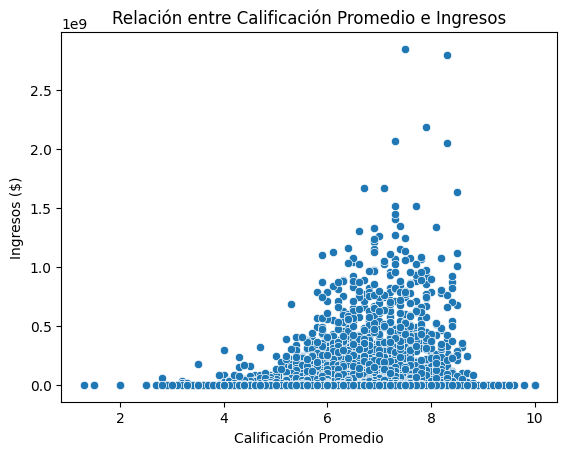

Matriz de correlación entre calificación e ingresos:
          voteAvg   revenue
voteAvg  1.000000  0.141262
revenue  0.141262  1.000000


In [33]:
sns.scatterplot(x=df['voteAvg'], y=df['revenue'])
plt.xlabel("Calificación Promedio")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Calificación Promedio e Ingresos")
plt.show()

correlation = df[['voteAvg', 'revenue']].corr()
print("Matriz de correlación entre calificación e ingresos:")
print(correlation)


# Pregunta 15 
¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

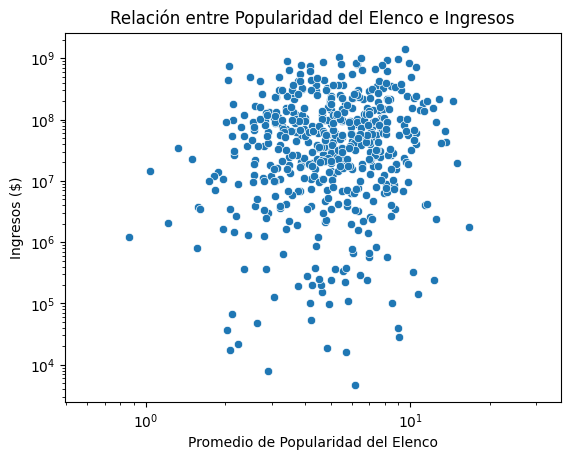

Matriz de correlación entre popularidad del elenco e ingresos:
                     actorsPopularityAvg   revenue
actorsPopularityAvg             1.000000  0.082245
revenue                         0.082245  1.000000


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplazar valores vacíos y no numéricos con NaN
df['actorsPopularity'] = df['actorsPopularity'].apply(
    lambda x: x if isinstance(x, str) and all(c.isdigit() or c in '.|' for c in x) else None
)

# Eliminar filas con valores incorrectos
df = df.dropna(subset=['actorsPopularity'])

# Reemplazar valores vacíos en la lista con '0'
df['actorsPopularity'] = df['actorsPopularity'].apply(lambda x: '|'.join(['0' if v == '' else v for v in x.split('|')]))

# Convertir a una lista de floats y calcular el promedio
df['actorsPopularityAvg'] = df['actorsPopularity'].str.split('|').apply(
    lambda x: sum(map(float, x)) / len(x) if isinstance(x, list) and len(x) > 0 else 0
)

# Tomar una muestra aleatoria de 1000 filas para mejorar el rendimiento
df_sample = df.sample(n=1000, random_state=42) if len(df) > 1000 else df

# Graficar
sns.scatterplot(x=df_sample['actorsPopularityAvg'], y=df_sample['revenue'])
plt.xlabel("Promedio de Popularidad del Elenco")
plt.ylabel("Ingresos ($)")
plt.title("Relación entre Popularidad del Elenco e Ingresos")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Calcular la correlación
correlation = df[['actorsPopularityAvg', 'revenue']].corr()
print("Matriz de correlación entre popularidad del elenco e ingresos:")
print(correlation)


# Pregunta 16
¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

[False nan True]


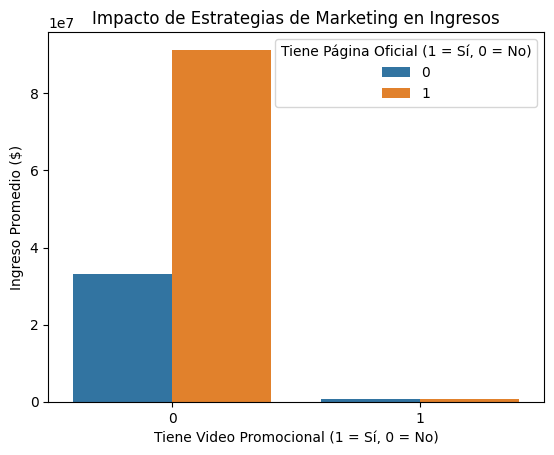

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


print(df['video'].unique())


df['hasVideo'] = df['video'].fillna(0).astype(int)

df['hasHomePage'] = df['homePage'].notna().astype(int)

marketing_effects = df.groupby(['hasVideo', 'hasHomePage'])['revenue'].mean().reset_index()

sns.barplot(x=marketing_effects['hasVideo'], y=marketing_effects['revenue'], hue=marketing_effects['hasHomePage'])
plt.xlabel("Tiene Video Promocional (1 = Sí, 0 = No)")
plt.ylabel("Ingreso Promedio ($)")
plt.title("Impacto de Estrategias de Marketing en Ingresos")
plt.legend(title="Tiene Página Oficial (1 = Sí, 0 = No)")
plt.show()


# Distribucion y Frecuencia

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, probplot
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Identificar variables cuantitativas
quantitative_vars = df.select_dtypes(include=[np.number])

# Comprobar normalidad para variables cuantitativas
normality_results = []
for column in quantitative_vars.columns:
    stat, p_value = shapiro(quantitative_vars[column].dropna())
    normality_results.append({
        'Variable': column,
        'Shapiro-Wilk Stat': stat,
        'p-value': p_value,
        'Normal': p_value > 0.05  # True si p > 0.05
    })

normality_df = pd.DataFrame(normality_results)
normality_df

c:\Users\pablo\OneDrive - UVG\Escritorio\UVG\7mo Semestre\Mineria de datos\Modulo 1\Proyecto\Proyecto1-mineria\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


,Variable,Shapiro-Wilk Stat,p-value,Normal
0,id,0.854749,7.918262e-70,False
1,budget,0.568430,4.705589e-94,False
2,revenue,0.414296,1.651197e-101,False
3,runtime,0.853102,4.642138e-70,False
4,popularity,0.111248,3.718788e-112,False
5,voteAvg,0.979618,1.954301e-35,False
6,voteCount,0.526065,2.615404e-96,False
7,genresAmount,0.905370,2.643745e-61,False
8,productionCoAmount,0.715044,2.194324e-84,False
9,productionCountriesAmount,0.233192,2.514135e-108,False


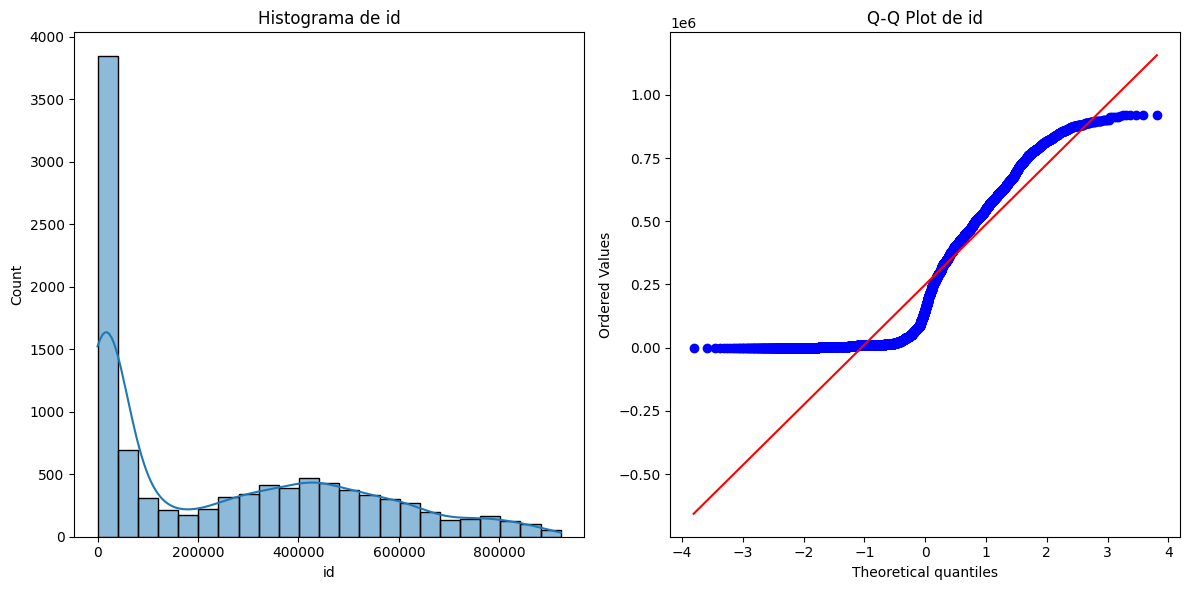

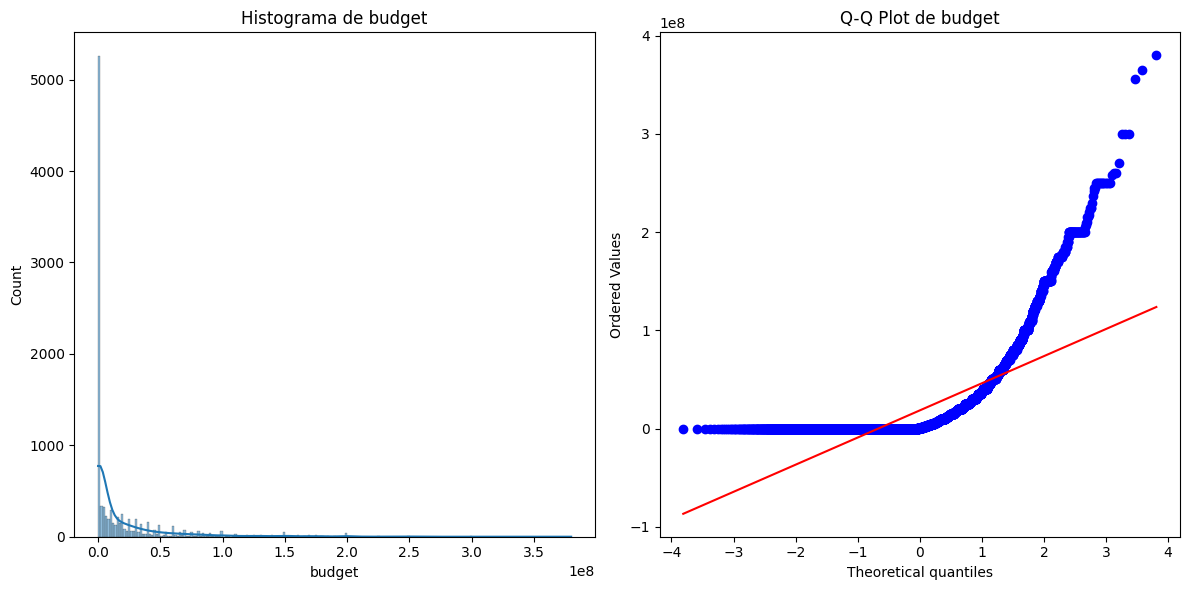

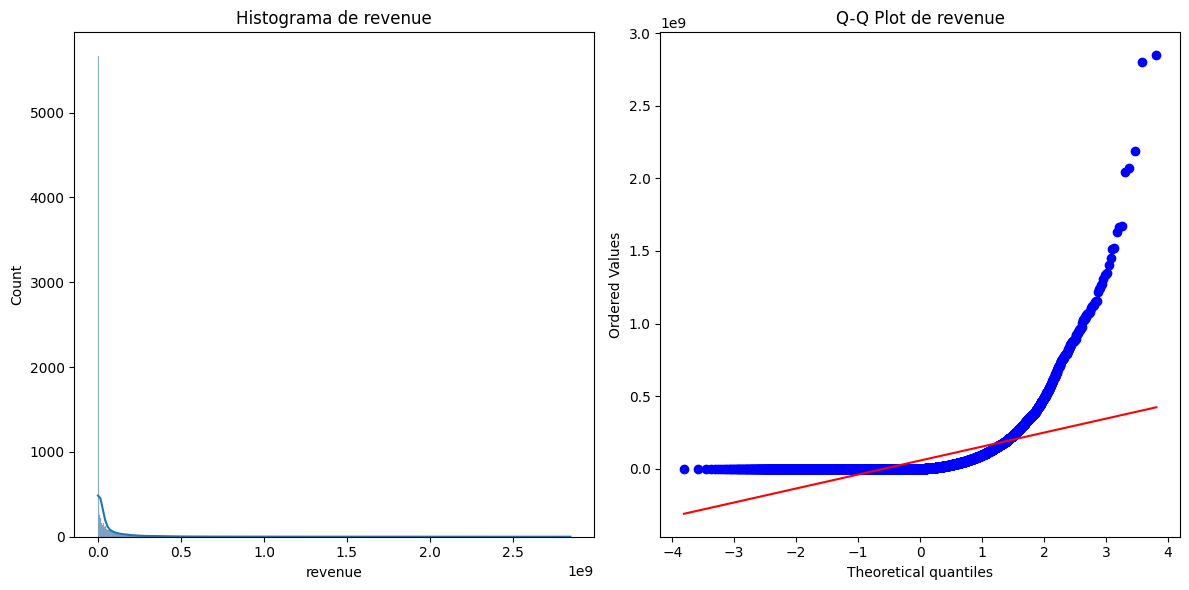

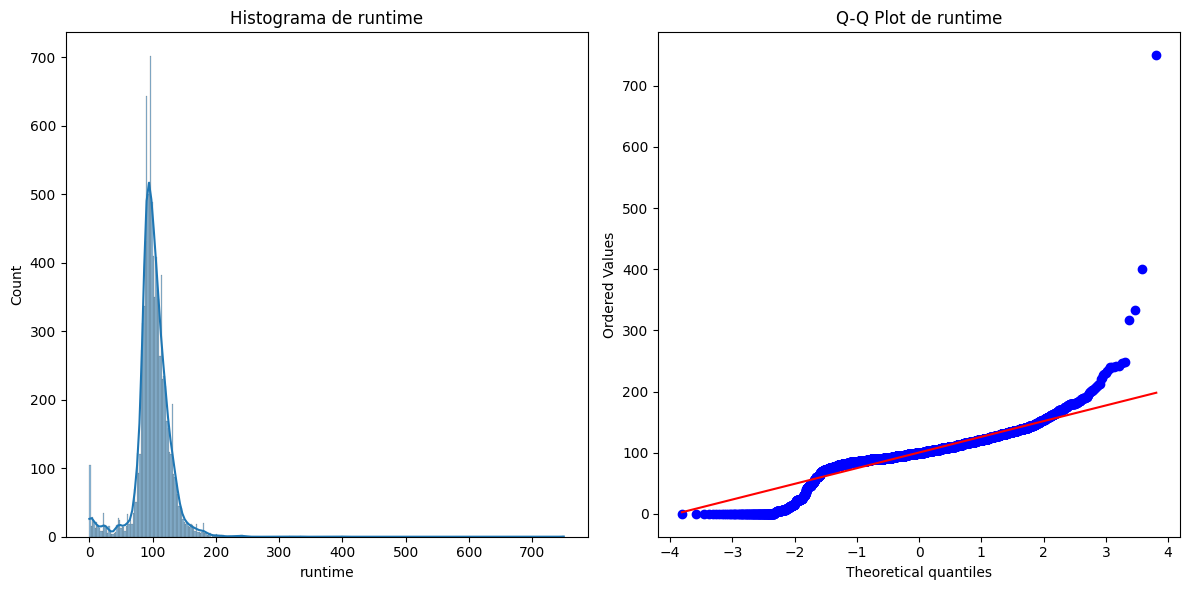

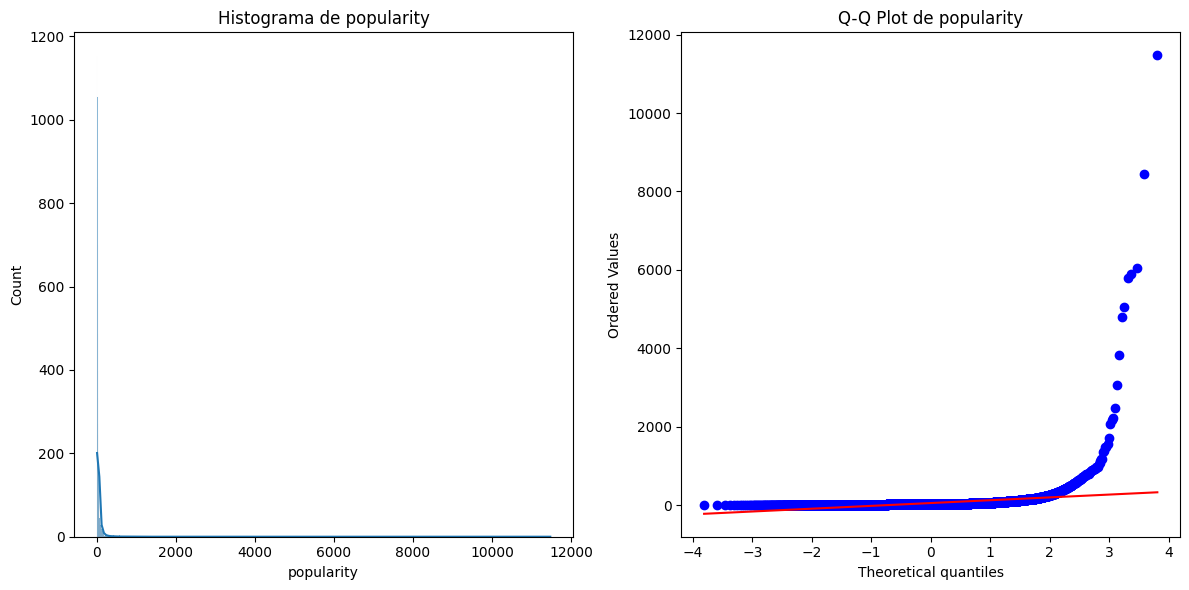

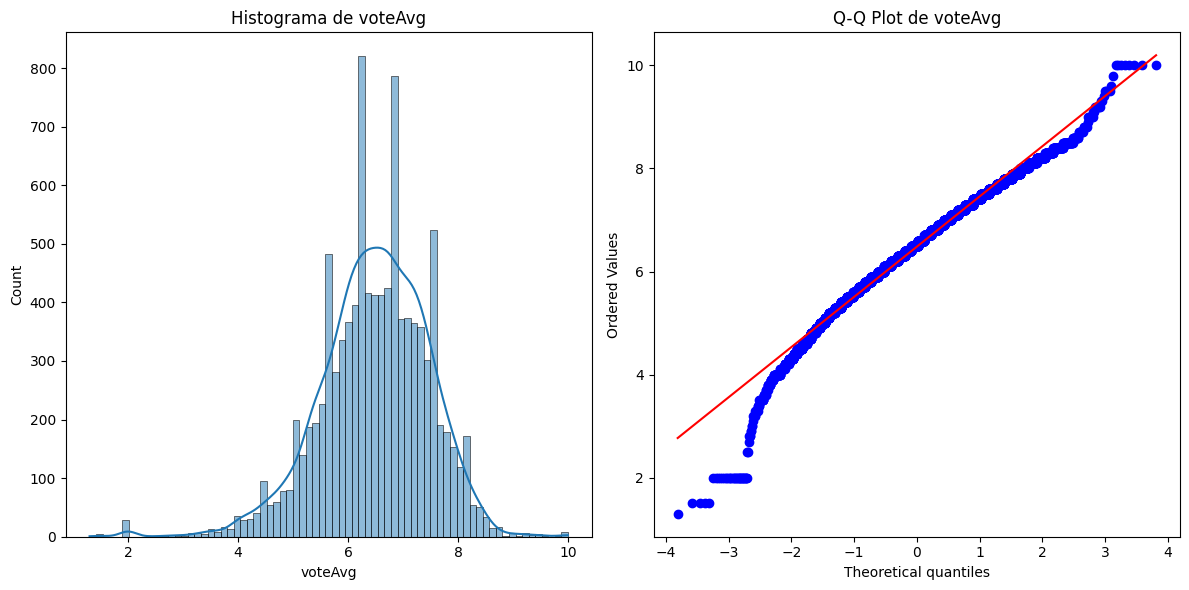

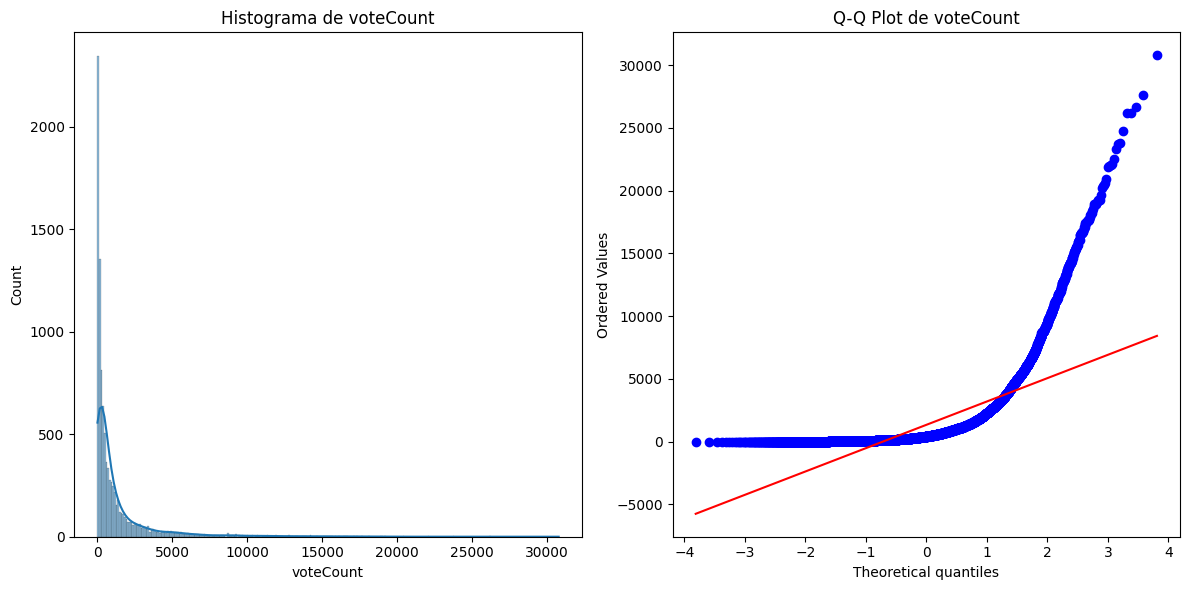

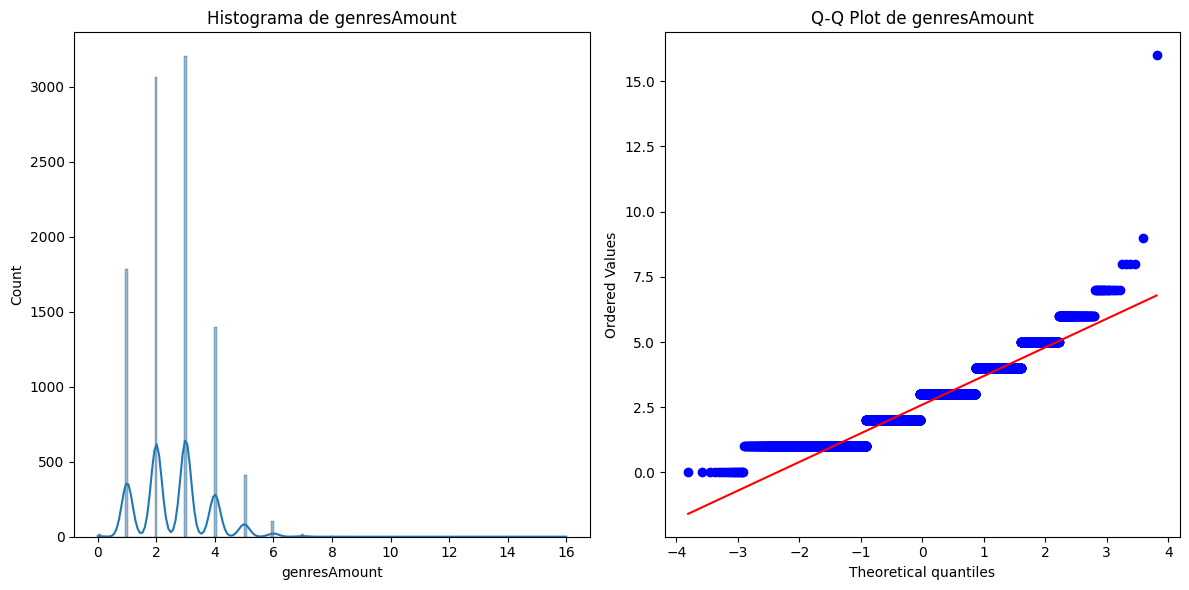

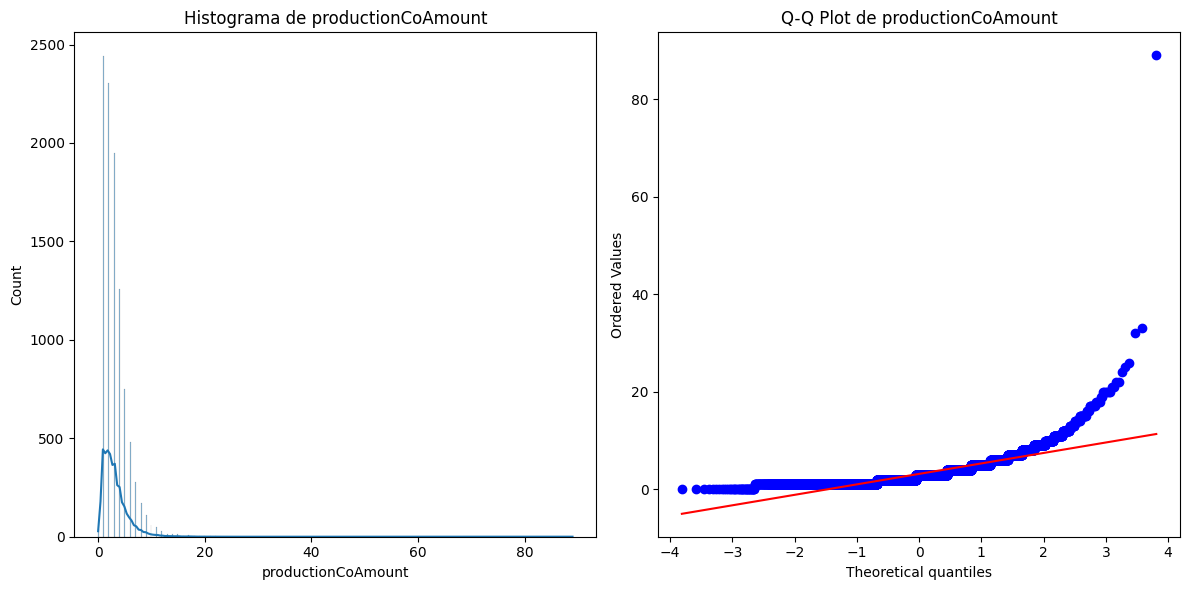

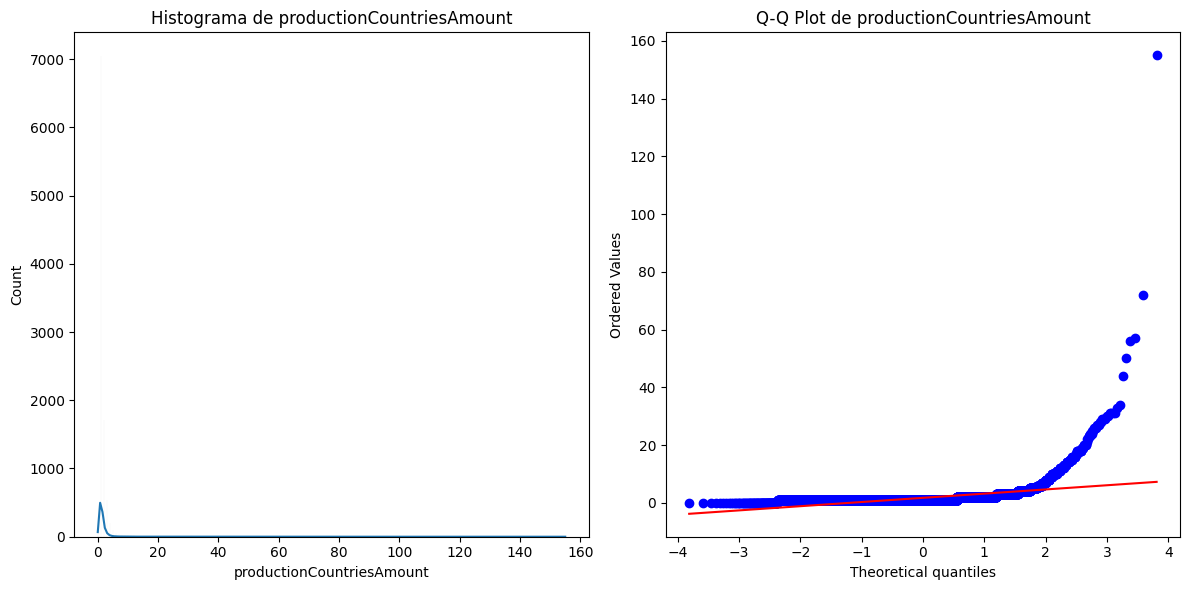

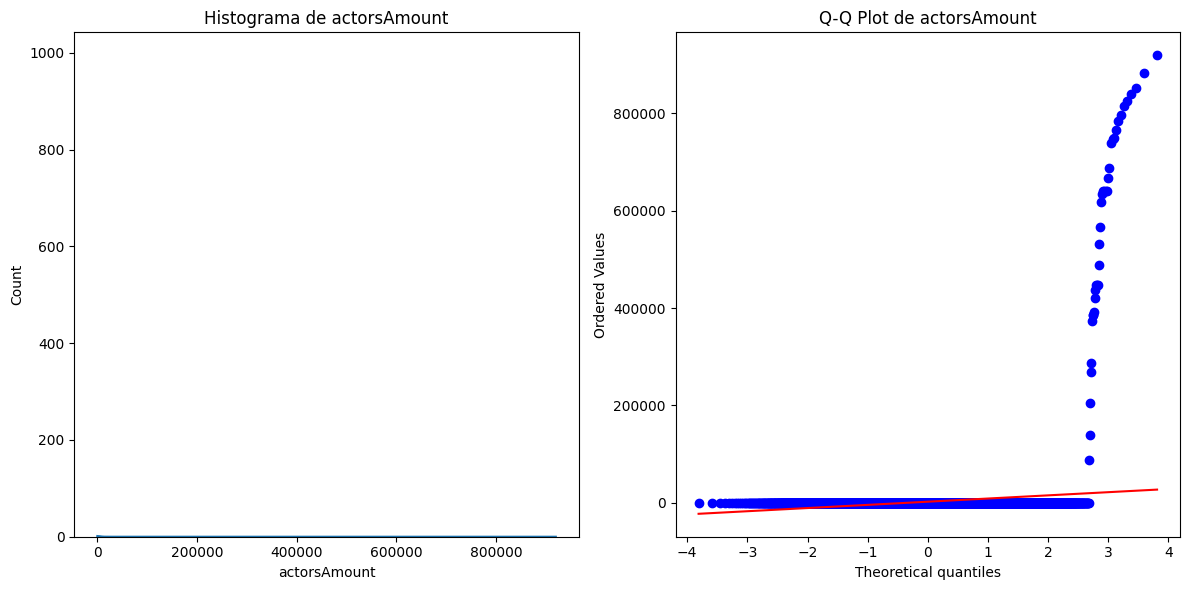

In [11]:
# Graficar histogramas y Q-Q plots
for column in quantitative_vars.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(quantitative_vars[column].dropna(), kde=True)
    plt.title(f"Histograma de {column}")
    
    plt.subplot(1, 2, 2)
    probplot(quantitative_vars[column].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {column}")
    
    plt.tight_layout()
    plt.show()


In [12]:
# Identificar variables cualitativas
qualitative_vars = df.select_dtypes(include=['object', 'category'])

# Crear tablas de frecuencias para cada variable cualitativa
frequency_tables = {}
for column in qualitative_vars.columns:
    frequency_tables[column] = qualitative_vars[column].value_counts()

for column, freq_table in frequency_tables.items():
    print(f"\nTabla de frecuencias para {column}:")
    print(freq_table)



Tabla de frecuencias para genres:
genres
Drama                                                521
Comedy                                               440
Horror                                               230
Drama|Romance                                        211
Horror|Thriller                                      205
                                                    ... 
Crime|Comedy|Romance                                   1
Animation|Science Fiction|Adventure|Fantasy|Music      1
Animation|Comedy|Music|Family                          1
Crime|Thriller|Drama|Action                            1
Romance|Comedy|Music                                   1
Name: count, Length: 2345, dtype: int64

Tabla de frecuencias para homePage:
homePage
http://www.naruto-movie.com/                                                                          6
http://www.thehungergames.movie/                                                                      4
http://www.kungfupanda.com/          